In [1]:
# libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
import warnings
warnings='ignore'
from sklearn.cluster import KMeans
import os

import math
%matplotlib inline

In [2]:
employment=pd.read_csv('/Users/macos/Desktop/student crisis/Long_empl_household_dynamics/all_employement_flow.csv')
earnings=pd.read_csv('/Users/macos/Desktop/student crisis/Long_empl_household_dynamics/all_earnings.csv')

/Users/macos/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4,9,11) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
employment.head(2)

,agg_level_pseo,inst_level,institution,degree_level,cip_level,cipcode,grad_cohort,grad_cohort_years,geo_level,geography,...,y5_grads_emp,y5_grads_emp_instate,y10_grads_emp,y10_grads_emp_instate,status_y1_grads_emp,status_y1_grads_emp_instate,status_y5_grads_emp,status_y5_grads_emp_instate,status_y10_grads_emp,status_y10_grads_emp_instate
0,38,I,1345,3,A,0,0,5,N,0,...,321.0,78.0,80.0,31.0,1,1,1,1,1,1
1,38,I,1345,5,A,0,0,3,N,0,...,3691.0,1505.0,1604.0,750.0,1,1,1,1,1,1


In [4]:
earnings.head(2)

,agg_level_pseo,inst_level,institution,degree_level,cip_level,cipcode,grad_cohort,grad_cohort_years,geo_level,geography,...,y1_ipeds_count,y5_ipeds_count,y10_ipeds_count,status_y1_earnings,status_y1_grads_earn,status_y5_earnings,status_y5_grads_earn,status_y10_earnings,status_y10_grads_earn,status_ipeds_count
0,38,I,1345,3,A,00,0,5,N,0,...,886.0,253.0,126.0,1,1,1,1,1,1,1.0
1,38,I,1345,5,A,00,0,3,N,0,...,4786.0,3629.0,1742.0,1,1,1,1,1,1,1.0


In [5]:
employment.columns

Index(['agg_level_pseo', 'inst_level', 'institution', 'degree_level',
       'cip_level', 'cipcode', 'grad_cohort', 'grad_cohort_years', 'geo_level',
       'geography', 'ind_level', 'industry', 'y1_grads_emp',
       'y1_grads_emp_instate', 'y5_grads_emp', 'y5_grads_emp_instate',
       'y10_grads_emp', 'y10_grads_emp_instate', 'status_y1_grads_emp',
       'status_y1_grads_emp_instate', 'status_y5_grads_emp',
       'status_y5_grads_emp_instate', 'status_y10_grads_emp',
       'status_y10_grads_emp_instate'],
      dtype='object')

In [32]:
# calculate the percentage of graduate employed in the same state of their institution
employment['percentage_instate_1']= (employment.y1_grads_emp_instate / employment.y1_grads_emp)*100
employment['percentage_instate_5']= (employment.y5_grads_emp_instate / employment.y5_grads_emp)*100
employment['percentage_instate_10']= (employment.y10_grads_emp_instate / employment.y10_grads_emp)*100



In [33]:
employment['percentage_instate_1'].fillna(0)
employment['percentage_instate_5'].fillna(0)
employment['percentage_instate_10'].fillna(0)

0          38.750000
1          46.758105
2          64.187328
3          44.146079
4          56.356488
             ...    
1679074     0.000000
1679075     0.000000
1679076     0.000000
1679077     0.000000
1679078     0.000000
Name: percentage_instate_10, Length: 1679079, dtype: float64

# Employment flow

In [38]:
# Group instiontion to number of graduates employee- YEAR 1
emp_institution_year1=employment.groupby('institution')
empl_y1=emp_institution_year1['y1_grads_emp'].sum().sort_values(ascending=False)
pp1=pd.DataFrame(empl_y1.head(15))
pp1.head(10)
                 

,y1_grads_emp
institution,
3658,3036532.0
2325,2579952.0
3895,2402760.0
1370,1718008.0
3656,1459716.0
1350,1428044.0
10115,1085044.0
4508,950888.0
9741,913976.0


In [37]:
# Group instiontion to number of graduates employee- YEAR 1
emp_institution_year5=employment.groupby('institution')
empl_y5=emp_institution_year5['y5_grads_emp'].sum().sort_values(ascending=False)
pp=pd.DataFrame(empl_y5.head(15))
pp.head(10)

,y5_grads_emp
institution,
3658,2277188.0
2325,1826460.0
3895,1770056.0
1370,1301556.0
1350,1033172.0
3656,955296.0
10115,779412.0
4508,623428.0
9741,605056.0


In [39]:
# Group instiontion to number of graduates employee- YEAR 1
emp_institution_year5=employment.groupby('institution')
empl_y5=emp_institution_year5['y10_grads_emp'].sum().sort_values(ascending=False)
pp10=pd.DataFrame(empl_y5.head(15))
pp10.head(10)

,y10_grads_emp
institution,
3658,1128616.0
2325,880288.0
3895,818692.0
1370,614820.0
1350,491408.0
3656,418372.0
10115,337740.0
4508,271712.0
9741,267152.0


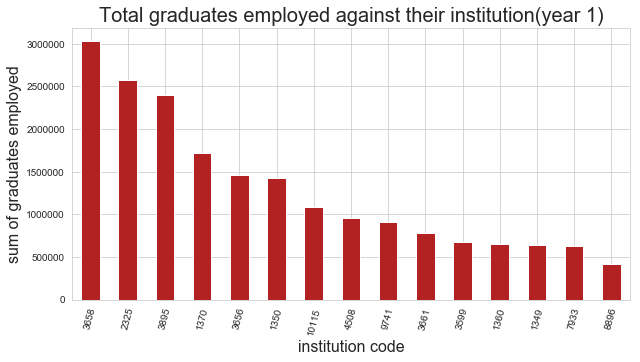

*************************************************************************


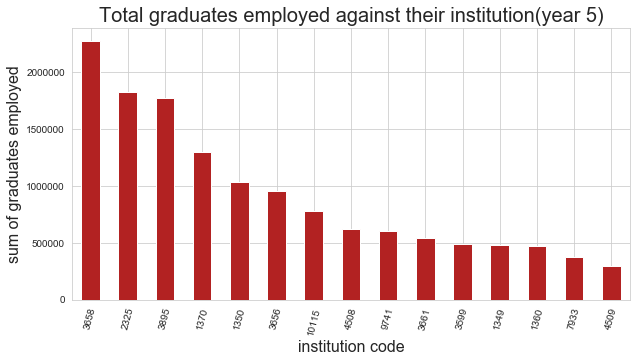

In [36]:
# visualization


inst_y1=empl_y1.reset_index()
inst_y1[:10]
# plotting mean of graduated employed on different instititions
plt.figure(figsize=(10,5))
empl_y1.head(15).plot.bar(color='firebrick')
plt.bar(empl_y1.head(10),height=0.5 ,color='firebrick' )

plt.xlabel("institution code",fontsize=16)
plt.xticks(rotation=75)
plt.ylabel("sum of graduates employed",fontsize=16)

plt.title("Total graduates employed against their institution(year 1)", fontsize=20)

plt.show()
print('*************************************************************************')
inst_y5=empl_y5.reset_index()
inst_y5[:10]
# plotting the distribution of frequently bought goods

plt.figure(figsize=(10,5))
empl_y5.head(15).plot.bar(color='firebrick')
plt.bar(empl_y5.head(10),height=0.5 ,color='firebrick' )

plt.xlabel("institution code",fontsize=16)
plt.xticks(rotation=75)
plt.ylabel("sum of graduates employed",fontsize=16)

plt.title("Total graduates employed against their institution(year 5)", fontsize=20)
plt.show()

1:Certificate< 1 year

2: Certificate_1-2_years

3:Associates

4:Certificate_2-4_years

5:Baccalaureate

6:Post-Bacc Certificate

7:Masters

8:Post_Masters_Certificate,

17:Doctoral_Research_Scholarship

18:Doctoral_Professional Practice

In [11]:
# Group degree levels by employment - YEAR1
emp_institution_year1=employment.groupby('degree_level')
empl_y1=emp_institution_year1['y1_grads_emp'].sum().sort_values(ascending=False)
empl_y1.head(15)

degree_level
5     14665016.0
7      4896820.0
3      1589788.0
1      1391184.0
17      852896.0
18      835616.0
2       505372.0
6        17344.0
8            0.0
4            0.0
Name: y1_grads_emp, dtype: float64

In [12]:
# Group degree levels by employment - YEAR5
emp_institution_year1=employment.groupby('degree_level')
empl_y5=emp_institution_year1['y5_grads_emp'].sum().sort_values(ascending=False)
empl_y5.head(15)

degree_level
5     11178080.0
7      2937316.0
3       923940.0
1       714516.0
18      524088.0
17      515752.0
2       331280.0
6         9296.0
8            0.0
4            0.0
Name: y5_grads_emp, dtype: float64

In [13]:
# Group degree levels by employment - YEAR10
emp_institution_year1=employment.groupby('degree_level')
empl_y0=emp_institution_year1['y10_grads_emp'].sum().sort_values(ascending=False)
empl_y0.head(15)

degree_level
5     5112336.0
7     1412968.0
3      450232.0
1      292200.0
18     239056.0
17     229632.0
2      178816.0
6        2704.0
8           0.0
4           0.0
Name: y10_grads_emp, dtype: float64

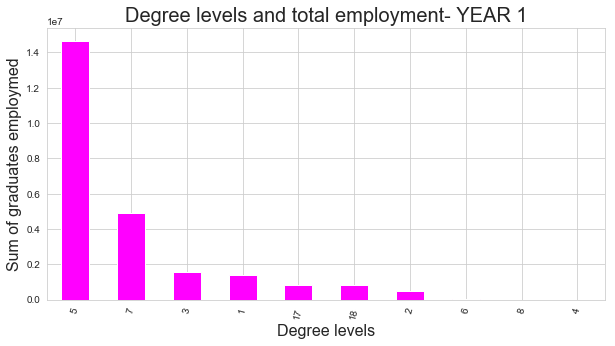

********************************************************************************************


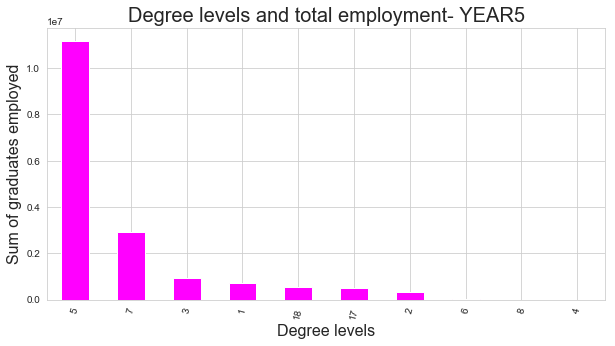

****************************************************************************************


Text(0.5, 1.0, 'Degree levels and total employment-YEAR 10')

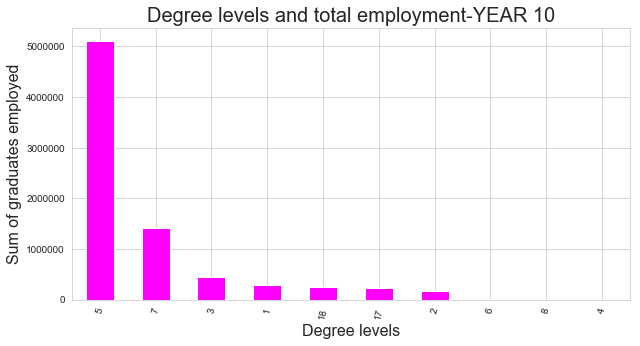

In [14]:
# Visualization of  Group degree levels by employment
inst_y1=empl_y1.reset_index()
inst_y1[:10]

plt.figure(figsize=(10,5))
empl_y1.head(15).plot.bar(color='magenta')
plt.bar(empl_y1.head(10),height=0.5 ,color='magenta' )

plt.xlabel("Degree levels",fontsize=16)
plt.xticks(rotation=75)
plt.ylabel("Sum of graduates employmed",fontsize=16)

plt.title("Degree levels and total employment- YEAR 1", fontsize=20)
plt.show()
print('********************************************************************************************')
# Visualization
inst_y5=empl_y5.reset_index()
inst_y5[:10]

plt.figure(figsize=(10,5))
empl_y5.head(15).plot.bar(color='magenta')
plt.bar(empl_y5.head(10),height=0.5 ,color='magenta' )

plt.xlabel("Degree levels",fontsize=16)
plt.xticks(rotation=75)
plt.ylabel("Sum of graduates employed",fontsize=16)

plt.title("Degree levels and total employment- YEAR5", fontsize=20)
plt.show()
print('****************************************************************************************')
# Visualization
inst_y0=empl_y0.reset_index()
inst_y0[:10]

plt.figure(figsize=(10,5))
empl_y0.head(15).plot.bar(color='magenta')
plt.bar(empl_y0.head(10),height=0.5 ,color='magenta' )

plt.xlabel("Degree levels",fontsize=16)
plt.xticks(rotation=75)
plt.ylabel("Sum of graduates employed",fontsize=16)

plt.title("Degree levels and total employment-YEAR 10", fontsize=20)


In [40]:
# institution by industry
emp_institution_yr1=employment.groupby('institution')
top_insti = emp_institution_yr1['industry'].unique().agg(np.size).sort_values(ascending=False)
top_insti.head(10)

institution
42439    23
1362     23
3659     23
3658     23
3656     23
3599     23
2325     23
1372     23
1370     23
1368     23
Name: industry, dtype: int64

In [41]:
# focusing on 3658 since it had the highest number of graduates employed
top_insti1= employment[employment['institution'] == 3658].groupby('industry')['y1_grads_emp'].sum().sort_values(ascending=False)
top_insti1.head(10)
# focusing on 3658 since it had the highest number of graduates employed
top_insti5= employment[employment['institution'] == 3658].groupby('industry')['y5_grads_emp'].sum().sort_values(ascending=False)
top_insti5.head(10)
# focusing on 3658 since it had the highest number of graduates employed
top_insti0= employment[employment['institution'] == 3658].groupby('industry')['y10_grads_emp'].sum().sort_values(ascending=False)
top_insti0.head(10)

industry
00       493855.0
ZZ       173840.0
54        81364.0
61        71884.0
0         70453.0
62        42184.0
31-33     29224.0
52        26840.0
42        21860.0
51        18364.0
Name: y10_grads_emp, dtype: float64

In [42]:
top_insti_y0=top_insti1.reset_index()
top_insti_y0[:10]

,industry,y1_grads_emp
0,00,1328629.0
1,ZZ,457124.0
2,54,260294.0
3,61,196912.0
4,0,189637.0
5,62,90410.0
6,31-33,82634.0
7,52,69468.0
8,42,52402.0
9,51,49936.0


In [43]:
top_ins= employment[employment['institution'] == 3658].groupby('industry')['cipcode'].value_counts().sort_values(ascending=False)



In [21]:
top_ins.head(30)

industry  cipcode
00        0          198
81        0          180
53        0          180
21        51         180
31-33     0          180
56        51         180
48-49     0          180
62        51         180
          0          180
42        51         180
          0          180
53        51         180
48-49     51         180
23        0          180
52        0          180
          51         180
72        0          180
22        0          180
          51         180
72        51         180
56        0          180
92        51         180
21        0          180
31-33     51         180
23        51         180
61        51         180
11        0          180
          51         180
44-45     51         180
          0          180
Name: cipcode, dtype: int64

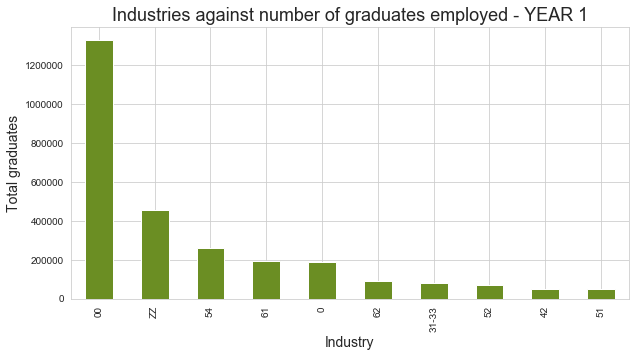

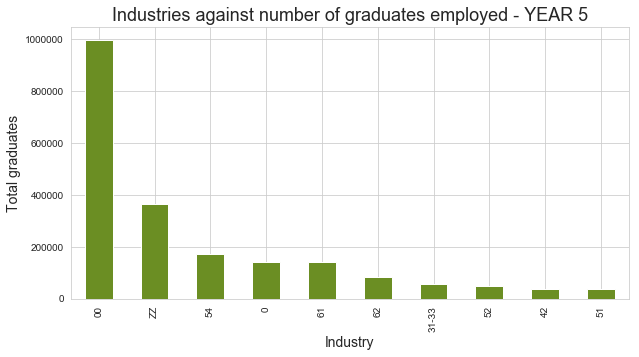

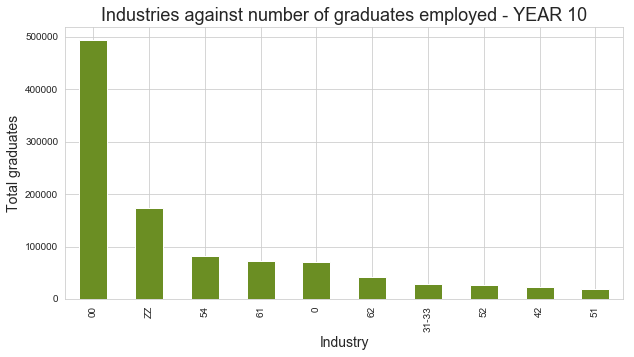

In [45]:
#   how graduates were employed in different industries in their first year of employmet
plt.figure(figsize=(10,5))
top_insti1.head(10).plot.bar(color='olivedrab')
plt.title("Industries against number of graduates employed - YEAR 1", fontsize=18)
plt.xlabel("Industry", fontsize=14)
plt.ylabel("Total graduates", fontsize=14)
plt.show()
#   how graduates were employed in different industries in their first year of employmet
plt.figure(figsize=(10,5))
top_insti5.head(10).plot.bar(color='olivedrab')
plt.title("Industries against number of graduates employed - YEAR 5", fontsize=18)
plt.xlabel("Industry", fontsize=14)
plt.ylabel("Total graduates", fontsize=14)
plt.show()

#   how graduates were employed in different industries in their first year of employmet
plt.figure(figsize=(10,5))
top_insti0.head(10).plot.bar(color='olivedrab')
plt.title("Industries against number of graduates employed - YEAR 10", fontsize=18)
plt.xlabel("Industry", fontsize=14)
plt.ylabel("Total graduates", fontsize=14)
plt.show()



# Earnings 

In [46]:
earnings.head()

,agg_level_pseo,inst_level,institution,degree_level,cip_level,cipcode,grad_cohort,grad_cohort_years,geo_level,geography,...,y1_ipeds_count,y5_ipeds_count,y10_ipeds_count,status_y1_earnings,status_y1_grads_earn,status_y5_earnings,status_y5_grads_earn,status_y10_earnings,status_y10_grads_earn,status_ipeds_count
0,38,I,1345,3,A,00,0,5,N,0,...,886.0,253.0,126.0,1,1,1,1,1,1,1.0
1,38,I,1345,5,A,00,0,3,N,0,...,4786.0,3629.0,1742.0,1,1,1,1,1,1,1.0
2,38,I,1345,7,A,00,0,5,N,0,...,3364.0,2139.0,1070.0,1,1,1,1,1,1,1.0
3,38,I,1346,1,A,00,0,5,N,0,...,7182.0,3495.0,923.0,1,1,1,1,1,1,1.0
4,38,I,1346,2,A,00,0,5,N,0,...,2507.0,1467.0,805.0,1,1,1,1,1,1,1.0


In [47]:
earnings.columns

Index(['agg_level_pseo', 'inst_level', 'institution', 'degree_level',
       'cip_level', 'cipcode', 'grad_cohort', 'grad_cohort_years', 'geo_level',
       'geography', 'ind_level', 'industry', 'y1_p25_earnings',
       'y1_p50_earnings', 'y1_p75_earnings', 'y1_grads_earn',
       'y5_p25_earnings', 'y5_p50_earnings', 'y5_p75_earnings',
       'y5_grads_earn', 'y10_p25_earnings', 'y10_p50_earnings',
       'y10_p75_earnings', 'y10_grads_earn', 'y1_ipeds_count',
       'y5_ipeds_count', 'y10_ipeds_count', 'status_y1_earnings',
       'status_y1_grads_earn', 'status_y5_earnings', 'status_y5_grads_earn',
       'status_y10_earnings', 'status_y10_grads_earn', 'status_ipeds_count'],
      dtype='object')

In [48]:
earnings["y1_p25_earnings"] = pd.to_numeric(earnings.y1_p25_earnings, errors='coerce')
earnings["y1_p50_earnings"] = pd.to_numeric(earnings.y1_p50_earnings, errors='coerce')
earnings["y1_p75_earnings"] = pd.to_numeric(earnings.y1_p75_earnings, errors='coerce')
earnings["y1_grads_earn"] = pd.to_numeric(earnings.y1_grads_earn, errors='coerce')
earnings["y5_p25_earnings"] = pd.to_numeric(earnings.y5_p25_earnings, errors='coerce')
earnings["y5_p50_earnings"] = pd.to_numeric(earnings.y5_p50_earnings, errors='coerce')
earnings["y5_p75_earnings"] = pd.to_numeric(earnings.y5_p75_earnings, errors='coerce')
earnings["y10_p25_earnings"] = pd.to_numeric(earnings.y10_p25_earnings, errors='coerce')
earnings["y10_p50_earnings"] = pd.to_numeric(earnings.y10_p50_earnings, errors='coerce')
earnings["y10_p75_earnings"] = pd.to_numeric(earnings.y10_p75_earnings, errors='coerce')
earnings["y1_ipeds_count"] = pd.to_numeric(earnings.y1_ipeds_count, errors='coerce')
earnings["y5_ipeds_count"] = pd.to_numeric(earnings.y5_ipeds_count, errors='coerce')
earnings["y10_ipeds_count"] = pd.to_numeric(earnings.y10_ipeds_count, errors='coerce')




In [49]:
earnings.dtypes

agg_level_pseo             int64
inst_level                object
institution                int64
degree_level               int64
cip_level                 object
cipcode                   object
grad_cohort                int64
grad_cohort_years          int64
geo_level                 object
geography                  int64
ind_level                 object
industry                   int64
y1_p25_earnings          float64
y1_p50_earnings          float64
y1_p75_earnings          float64
y1_grads_earn            float64
y5_p25_earnings          float64
y5_p50_earnings          float64
y5_p75_earnings          float64
y5_grads_earn            float64
y10_p25_earnings         float64
y10_p50_earnings         float64
y10_p75_earnings         float64
y10_grads_earn           float64
y1_ipeds_count           float64
y5_ipeds_count           float64
y10_ipeds_count          float64
status_y1_earnings         int64
status_y1_grads_earn       int64
status_y5_earnings         int64
status_y5_

In [50]:
year=earnings.groupby('institution')
year_earn=year['cipcode'].agg(np.size).sort_values(ascending=False)
year_earn.head(10)


institution
3895     857
2325     780
3658     673
1350     582
1370     504
3656     472
10115    459
3661     447
9543     411
8896     395
Name: cipcode, dtype: int64

In [51]:
# inst_code=earnings['institution']==3896
# inst_earn=inst_code.groupby('cipcode')
# inst_earn_code=inst_earn['y1_p25_earnings'].mean().sort_values(ascending=False)
inst = earnings[earnings['institution'] == '3896'].groupby('cipcode')['y1_p25_earnings'].mean().sort_values(ascending=False)
inst.head()

/Users/macos/anaconda3/lib/python3.7/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)


Series([], Name: y1_p25_earnings, dtype: float64)

In [29]:
top_in= earnings[earnings['institution'] == 3658]
topp=top_in.groupby('industry')['cipcode'].agg(np.sum).sort_values(ascending=False)

